#### This notebook looks into the estimated variances for the connectivity weights

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import cortico_cereb_connectivity.globals as gl
import cortico_cereb_connectivity.run_model as rm
import Functional_Fusion.dataset as fdata
import glob
import matplotlib.pyplot as plt
from cortico_cereb_connectivity.scripts.script_train_eval_models import *
import matplotlib.pyplot as plt
from scipy import stats

Reading sub-02 weight variance...
max: 0.0027516952050536075
Reading sub-03 weight variance...
max: 0.004017993360225584
Reading sub-04 weight variance...
max: 0.0009492070296664773
Reading sub-06 weight variance...
max: 0.005985526585929306
Reading sub-08 weight variance...
max: 0.0011865876335829019
Reading sub-09 weight variance...
max: 0.0011624106417886999
Reading sub-10 weight variance...
max: 0.0016867445557976106
Reading sub-12 weight variance...
max: 0.002014285347768836
Reading sub-14 weight variance...
max: 0.0006791996424581054
Reading sub-15 weight variance...
max: 0.0007068352930481215
Reading sub-17 weight variance...
max: 0.006481909882589508
Reading sub-18 weight variance...
max: 0.0003392117461972602
Reading sub-19 weight variance...
max: 0.0011088344411260978
Reading sub-20 weight variance...
max: 0.0016953526317144197
Reading sub-21 weight variance...
max: 0.00038804422152264754
Reading sub-22 weight variance...
max: 0.0025920494444785507
Reading sub-24 weight varia

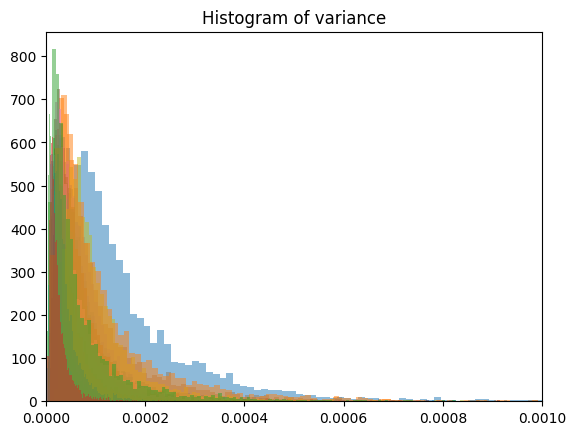

In [7]:
sub_weight_variance_list = []
var_folder = gl.conn_dir+'/SUIT3/ali_temp/cortico_cereb_connectivity/variance'

dataset = fdata.get_dataset_class(gl.base_dir,
                                    dataset="MDTB")
subject_list = dataset.get_participants().participant_id

# read subject weight variance matrix from file
variance_list = []
params_list = []
for s, sub in enumerate(subject_list):
    if s<30:
        print(f'Reading {str(sub)} weight variance...')
        file_path = os.path.join(var_folder, f'weight_variance_{str(sub)}.npy')
        variance = np.load(file_path)
        variance_list.append(variance)
        plt.hist(variance, bins='auto', alpha=0.5)
        shape, loc, scale = stats.gamma.fit(variance[~np.isnan(variance)], floc=0)
        params_list.append((shape, loc, scale))
        print(f'max: {np.nanmax(variance)}')

# show
plt.title('Histogram of variance')
plt.xlim((0,0.001))
plt.show()

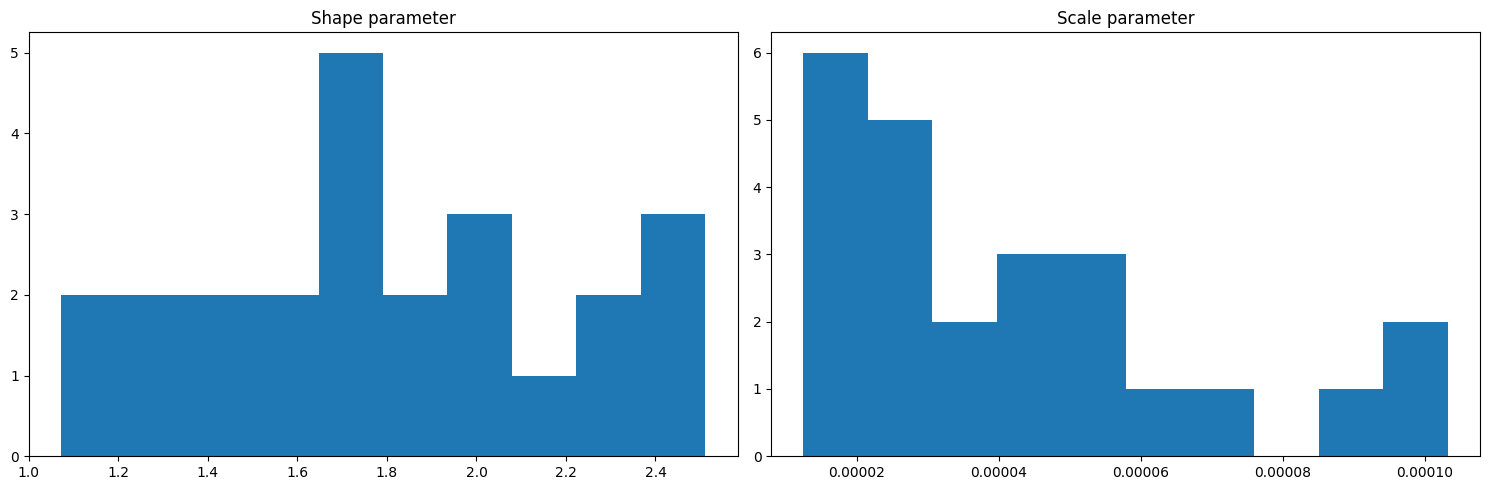

(1.4067486842749997, 1.277053426671046, 1.1328150830096837, 1.4097048103536705, 2.0648670026247653, 1.6958071349573614, 2.418175178221947, 1.64663192468651, 2.303449282655381, 2.196768808481926, 1.6871730244950545, 2.2344338940004236, 1.8194967278142407, 1.7845065275970802, 1.9901045844731144, 1.510020436983294, 1.6734372570281666, 2.022575576074368, 2.496577361960838, 1.7729638629911928, 2.511268693146733, 1.2858801082140094, 1.0713484813115737, 1.8341508301558112)
(6.605239452769062e-05, 9.102431942977792e-05, 2.578805505592959e-05, 5.199109825069422e-05, 4.2102275773913645e-05, 3.844848839662707e-05, 3.654840883001306e-05, 4.954266692661573e-05, 2.35906023573305e-05, 2.9321076316774947e-05, 0.00010322406913850379, 1.2441592673525791e-05, 2.7498811630239356e-05, 2.9227066757232314e-05, 1.9167015452545088e-05, 5.72527897647864e-05, 4.1483242086100924e-05, 1.8031468629105787e-05, 4.392657884773028e-05, 1.5619553782790387e-05, 1.674095858695154e-05, 9.804854720328242e-05, 7.502038239202

In [8]:
shapes, _, scales = zip(*params_list)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].hist(shapes)
axs[0].set_title('Shape parameter')
axs[1].hist(scales)
axs[1].set_title('Scale parameter')

plt.tight_layout()
plt.show()

print(shapes)
print(scales)

/tmp/ipykernel_261790/1236273637.py:1: RuntimeWarning: All-NaN axis encountered
  plt.hist(np.nanmax(variance_list, axis=0) / np.nanmin(variance_list, axis=0), bins='auto')


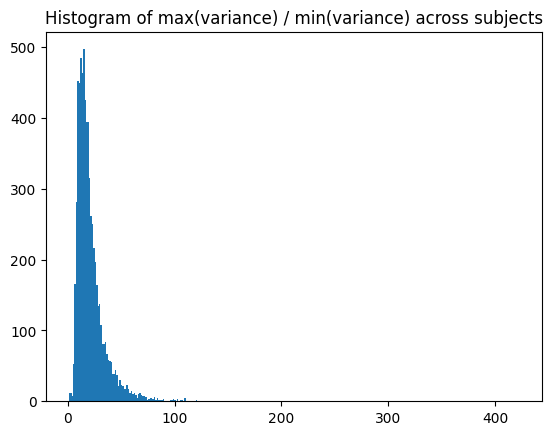

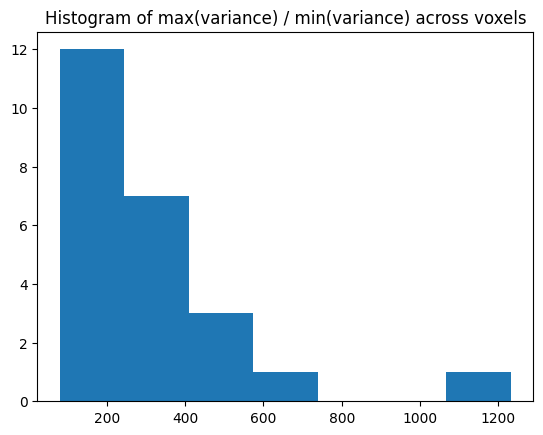

mean variance: [9.29191191e-05 1.16242919e-04 2.92130977e-05 7.32921013e-05
 8.69356000e-05 6.52012210e-05 8.83804550e-05 8.15785370e-05
 5.43397561e-05 6.44116259e-05 1.74156865e-04 2.77999164e-05
 5.00339978e-05 5.21558914e-05 3.81443653e-05 8.64528826e-05
 6.94196028e-05 3.64700080e-05 1.09666102e-04 2.76929044e-05
 4.20410452e-05 1.26078676e-04 8.03729727e-05 2.49582054e-05]
C_i: [0.02437514 0.01948434 0.07753084 0.0309026  0.0260528  0.03473733
 0.02562689 0.02776363 0.04168065 0.03516316 0.01300504 0.08147205
 0.04526754 0.04342589 0.05937748 0.02619827 0.03262646 0.06210353
 0.02065284 0.08178688 0.05387393 0.01796431 0.02818007 0.09074836]


In [9]:
plt.hist(np.nanmax(variance_list, axis=0) / np.nanmin(variance_list, axis=0), bins='auto')
plt.title('Histogram of max(variance) / min(variance) across subjects')
plt.show()

plt.hist(np.nanmax(variance_list, axis=1) / np.nanmin(variance_list, axis=1), bins='auto')
plt.title('Histogram of max(variance) / min(variance) across voxels')
plt.show()

mean_variance = np.nanmean(variance_list, axis=1)
print(f'mean variance: {mean_variance}')
c_i = np.reciprocal(mean_variance) / np.sum(np.reciprocal(mean_variance))
print(f'C_i: {c_i}')

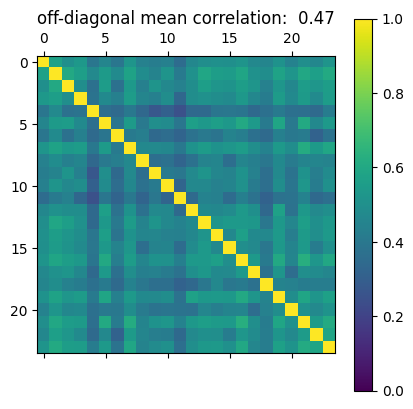

In [10]:
def rank_with_nan(arr):
    valid_indices = ~np.isnan(arr)
    ranks = np.empty_like(arr)
    ranks[valid_indices] = np.argsort(np.argsort(arr[valid_indices]))
    ranks[~valid_indices] = np.nan
    return ranks

all_sub_ranks = np.array([rank_with_nan(variance_list[s]) for s in range(len(subject_list))])

correlation_matrix, _ = stats.spearmanr(all_sub_ranks, axis=1, nan_policy='omit')

mat = plt.matshow(correlation_matrix)
plt.colorbar()
mat.set_clim(0, 1)
plt.title(f'off-diagonal mean correlation: {np.mean(correlation_matrix[~np.eye(24, dtype=bool)]): .2f}')
plt.show()